# Gradient Boosting
Gradient Boosting is a powerful ensemble machine learning algorithm that is used for both regression and classification tasks. The fundamental idea behind gradient boosting is to build a model in a stage-wise fashion, sequentially adding models to correct the errors of the previous models, and combining them to produce a strong predictive model.

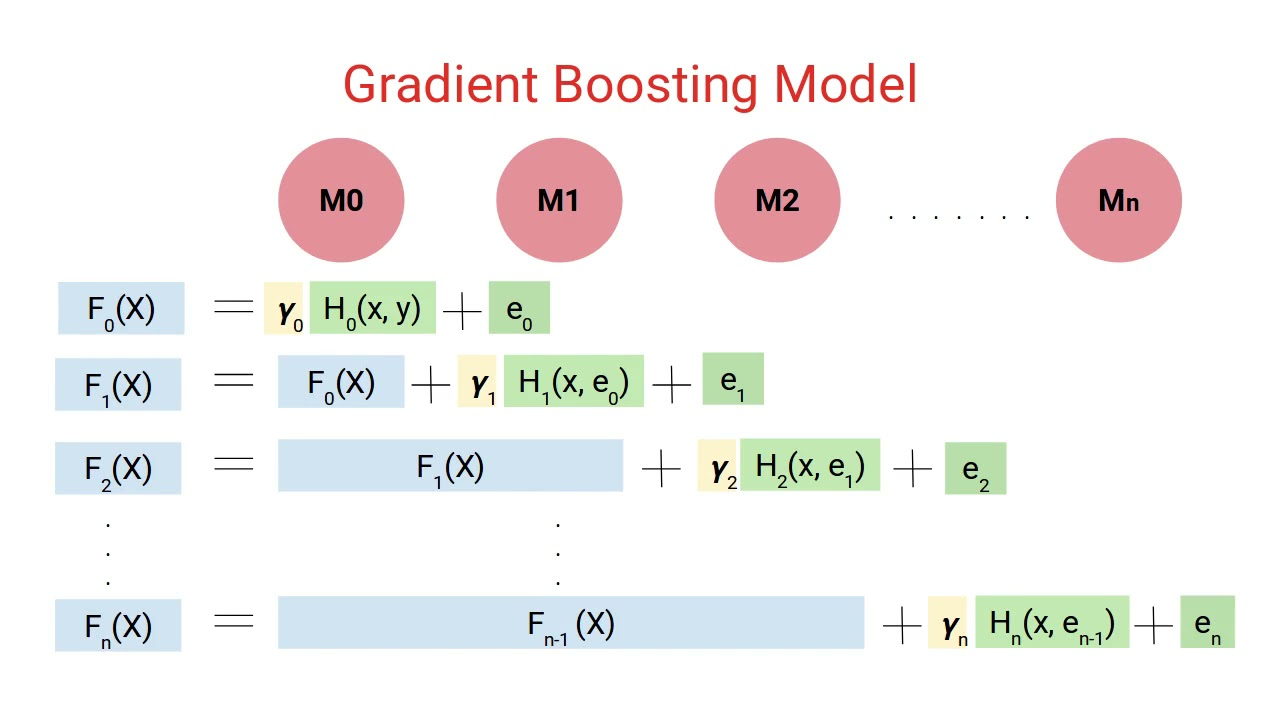
## How Does Gradient Boosting Work?

* **Initial Model**: Start with an initial model, typically a simple one like a constant value (e.g., the mean of the target variable).

* **Compute Residuals**: Calculate the residuals (errors) of the current model. Residuals are the differences between the observed values and the predicted values by the model.

* **Fit a New Model**: A new model (typically a decision tree) is trained on these residuals. The goal is to predict the residuals, not the original target variable.

* **Update the Model**: The predictions of this new model are added to the previous model to improve it. The model is updated by combining the predictions of all previous models with the new model’s predictions.

* **Repeat**: Steps 2-4 are repeated for a predetermined number of iterations or until a stopping criterion is met.

* **Final Model**: The final model is a combination of all the models (often weighted by their learning rate) created during the process.

## Gradient Boosting: Mathematical Insight

Given a dataset \( (X, y) \), where \( X \) are the input features and \( y \) is the target variable:

1. **Initial Model**:
   $$
   F_0(x) = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, \gamma)
   $$
   Here, \( L(y_i, \gamma) \) is the loss function, such as Mean Squared Error (MSE) for regression.

2. **Residuals**:
   $$
   r_{im} = -\frac{\partial L(y_i, F_{m-1}(x_i))}{\partial F_{m-1}(x_i)}
   $$
   The residuals are essentially the negative gradient of the loss function concerning the predictions.

3. **New Model**:
   - Train a weak learner (like a decision tree) on the residuals \( r_{im} \).

4. **Update**:
   $$
   F_m(x) = F_{m-1}(x) + \eta h_m(x)
   $$
   Here, \( h_m(x) \) is the new model, and \( \eta \) is the learning rate that controls how much of the new model is added.

5. **Final Model**:
   $$
   F(x) = F_0(x) + \sum_{m=1}^{M} \eta h_m(x)
   $$

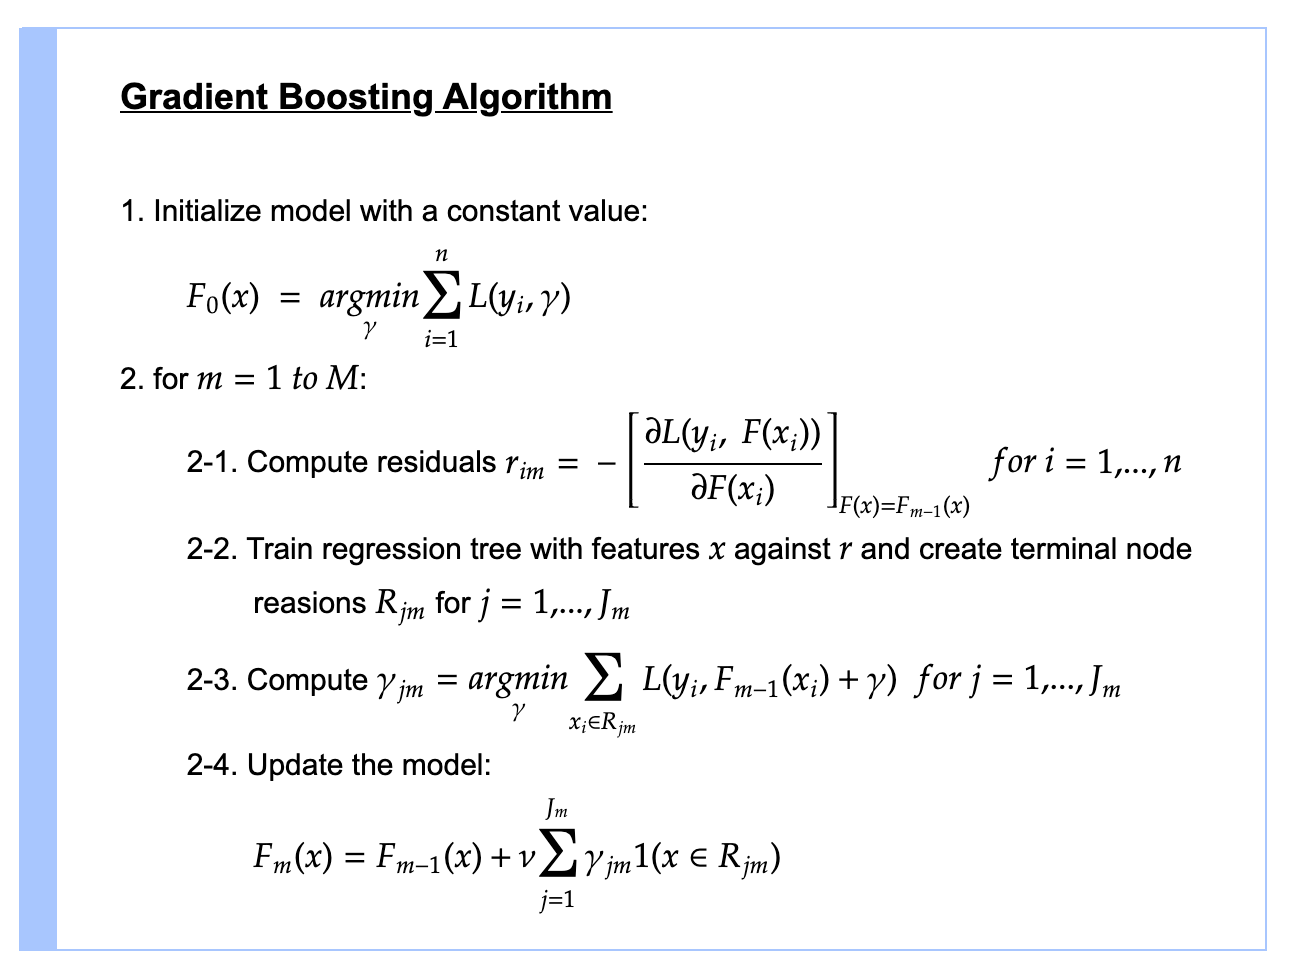

## Parameters of Gradient Boosting

1. **Learning Rate (\(\eta\))**:
   - **Definition**: A small positive number that scales the contribution of each model. It controls the speed at which the model learns.
   - **Typical Values**: 0.01, 0.1, 0.2
   - **Choice**: A smaller learning rate generally requires more trees but can improve accuracy.

2. **Number of Trees (n_estimators)**:
   - **Definition**: The total number of decision trees to be built.
   - **Typical Values**: 100-1000
   - **Choice**: More trees generally improve performance, but after a point, they can lead to overfitting.

3. **Max Depth**:
   - **Definition**: The maximum depth of each individual tree.
   - **Typical Values**: 3-10
   - **Choice**: Deeper trees can model more complex patterns but are more prone to overfitting.

4. **Subsample**:
   - **Definition**: The fraction of samples used to fit individual trees.
   - **Typical Values**: 0.5-1.0
   - **Choice**: Lower values prevent overfitting but can increase variance.

5. **Min Samples Split**:
   - **Definition**: The minimum number of samples required to split an internal node.
   - **Typical Values**: 2-20
   - **Choice**: Higher values lead to simpler trees and reduce overfitting.

6. **Min Samples Leaf**:
   - **Definition**: The minimum number of samples required to be in a leaf node.
   - **Typical Values**: 1-20
   - **Choice**: Higher values prevent overfitting by ensuring leaves contain sufficient samples.

7. **Max Features**:
   - **Definition**: The maximum number of features considered for splitting a node.
   - **Typical Values**: "auto", "sqrt", "log2", or a fraction of total features
   - **Choice**: Controls overfitting; using fewer features can reduce variance.

8. **Loss Function**:
   - **Definition**: The function used to measure the error in predictions.
   - **Typical Values**: "deviance" (for classification), "exponential" (for classification), "mse" (for regression)
   - **Choice**: Depends on the problem type (classification or regression).

## How to Choose Ideal Parameter Values?

* **Cross-Validation**: Perform grid search or randomized search with cross-validation to find the best combination of parameters.

* **Learning Rate and n_estimators**: Often, a smaller learning rate with a larger number of trees is more effective. A common strategy is to start with a larger learning rate (0.1) and tune the number of trees.

* **Max Depth and Min Samples**: Start with a shallow tree (small max depth) and increase complexity as needed. Adjust `min_samples_split` and `min_samples_leaf` to prevent overfitting.

* **Subsample and Max Features**: Lower values for `subsample` and `max_features` help in reducing overfitting. Start with defaults and fine-tune based on validation performance.

* **Early Stopping**: Implement early stopping based on the validation error to prevent overfitting and save computation time.

# Importing Basic Libraries

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Describing Dataset

Dataset Link - https://www.kaggle.com/code/yasinnsariyildiz/gradient-boosting-machines-tutorial/input

In [6]:
df = pd.read_csv('ionosphere.csv')

In [7]:
df.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a01     351 non-null    int64  
 1   a02     351 non-null    int64  
 2   a03     351 non-null    float64
 3   a04     351 non-null    float64
 4   a05     351 non-null    float64
 5   a06     351 non-null    float64
 6   a07     351 non-null    float64
 7   a08     351 non-null    float64
 8   a09     351 non-null    float64
 9   a10     351 non-null    float64
 10  a11     351 non-null    float64
 11  a12     351 non-null    float64
 12  a13     351 non-null    float64
 13  a14     351 non-null    float64
 14  a15     351 non-null    float64
 15  a16     351 non-null    float64
 16  a17     351 non-null    float64
 17  a18     351 non-null    float64
 18  a19     351 non-null    float64
 19  a20     351 non-null    float64
 20  a21     351 non-null    float64
 21  a22     351 non-null    float64
 22  a2

The Ionosphere dataset is commonly used in machine learning for binary classification tasks. It contains radar data collected from a system in Goose Bay, Labrador. The radar signals were processed to detect whether the returns from the ionosphere indicated the presence of a structure (good radar return) or not (bad radar return). The dataset consists of both numerical features and a class label.
* **Features**:
   * The dataset contains 34 continuous features, named `a01` through `a34`.
   * Each feature represents a value derived from the radar return signals. These features include various measurements and transformations applied to the radar data.
   - The features do not have specific physical meanings by themselves but collectively describe the signal received by the radar system.
* **Class Label**:
   * The `class` column is the target variable, which is categorical.
   * It contains two possible values:
     - `"g"` for "good" radar returns, indicating the presence of some structure in the ionosphere.
     - `"b"` for "bad" radar returns, indicating the absence of structure, i.e., the radar signal passed through the ionosphere.

# Exploratory Data Analysis (EDA)

Numerical Columns are : Index(['a01', 'a02', 'a03', 'a04', 'a05', 'a06', 'a07', 'a08', 'a09', 'a10',
       'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20',
       'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30',
       'a31', 'a32', 'a33', 'a34'],
      dtype='object')


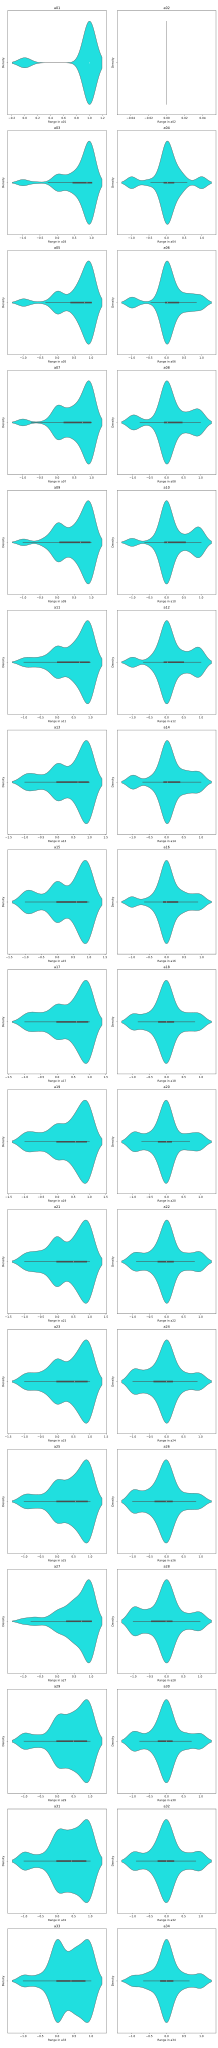

In [11]:
Numerical_Columns = df.select_dtypes(include = ['number']).columns
print(f'Numerical Columns are : {Numerical_Columns}')

num_cols = 2
num_rows = int(np.ceil(len(Numerical_Columns) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 6 * num_rows))
axes = axes.flatten()

for i, col in enumerate(Numerical_Columns):
    sns.violinplot(df, x=df[col], color='cyan', ax=axes[i])
    axes[i].set_xlabel(f'Range in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  

for j in range(len(Numerical_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

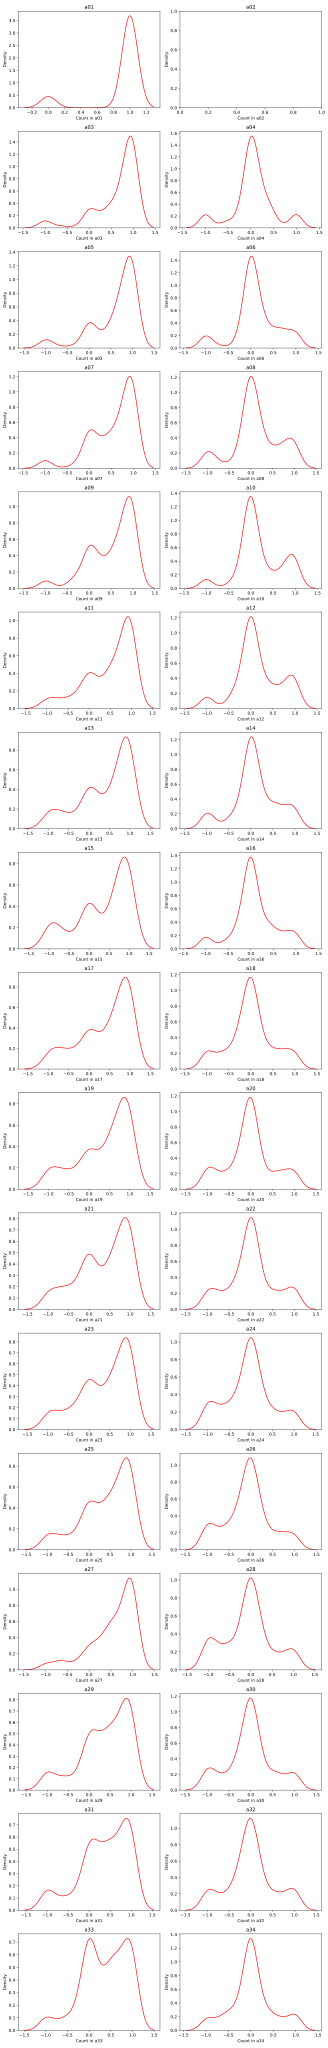

In [12]:
num_cols = 2
num_rows = int(np.ceil(len(Numerical_Columns) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 4 * num_rows))
axes = axes.flatten()


for i, col in enumerate(Numerical_Columns):
    sns.kdeplot(df[col], color='Red', ax=axes[i])
    axes[i].set_xlabel(f'Count in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  


for j in range(len(Numerical_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Count in Classes are : class
g    225
b    126
Name: count, dtype: int64


<Axes: xlabel='class', ylabel='count'>

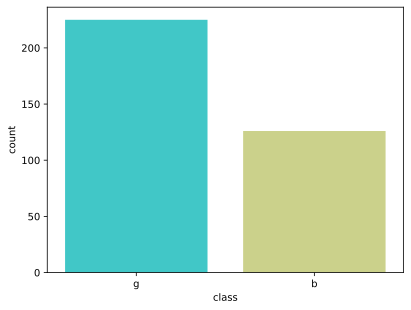

In [13]:
print(f'Count in Classes are : {df['class'].value_counts()}')
sns.countplot(x= df['class'], palette = 'rainbow')

# Data Preprocessing and Model Buidling

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('gbc', GradientBoostingClassifier(random_state=42))
])

#### Deifining X and y varaible as independent and dependent variable.

In [17]:
X = df.drop(columns='class')  
y = df['class']  

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## Model Pipiline Overview

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc', GradientBoostingClassifier(random_state=42))])

#### Feature Importances in Gradient Boosting Model

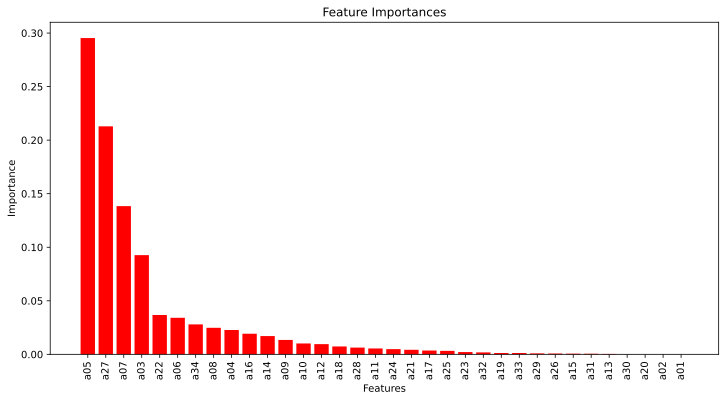

In [22]:
importances = pipeline.named_steps['gbc'].feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(x=feature_importance_df['Feature'], height=feature_importance_df['Importance'],color = 'Red')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

#### Model Prediction for Testing Data

In [24]:
y_pred = pipeline.predict(X_test)

# Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [28]:
param_grid = {
    'gbc__n_estimators': [50, 100, 200],
    'gbc__learning_rate': [0.01, 0.1],
    'gbc__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}\n')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.2f}\n')


best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Best Parameters: {accuracy:.2f}')

Best parameters: {'gbc__learning_rate': 0.1, 'gbc__max_depth': 3, 'gbc__n_estimators': 200}

Best cross-validation accuracy: 0.91

Accuracy on Best Parameters: 0.97


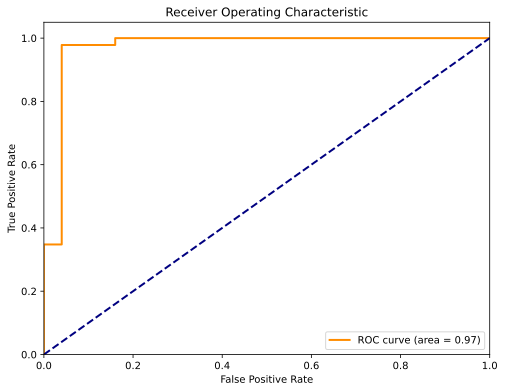

In [29]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='g')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

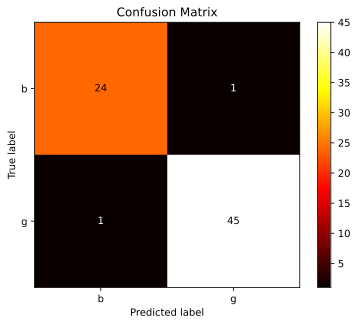

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.hot)
plt.title('Confusion Matrix')
plt.show()

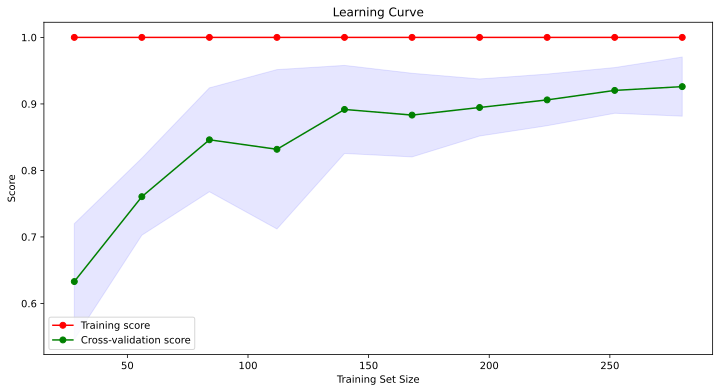

In [31]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Compute the mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

# Plot the variance as a shaded area
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='b')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Model Summary 

| **Metric**                     | **Value/Graph**                                                                                                   | **Interpretation**                                                                                                                                                                  |
|--------------------------------|-------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Model Accuracy**             | 0.97                                                                                                              | The model correctly classified 97% of the test data. This high accuracy indicates that the model is performing well on the test set.                                               |
| **Best Cross-Validation Accuracy** | 0.91                                                                                                              | This is the average accuracy during cross-validation. A score of 0.91 means that the model is generalizing well, though it shows some variance compared to the test accuracy.        |
| **Best Parameters**            | `{'gbc__learning_rate': 0.1, 'gbc__max_depth': 3, 'gbc__n_estimators': 200}`                                      | These are the hyperparameters that provided the best performance during the model tuning process.                                                                                   |
| **Confusion Matrix (CM)**      | `[[24  1], [ 1 45]]`                                                                                              | The confusion matrix shows that the model correctly classified 24 out of 25 instances of the negative class and 45 out of 46 instances of the positive class, with only 2 misclassifications overall. |
| **ROC AUC**                    | 0.97 (refer to the ROC curve graph)                                                                                | The ROC AUC score of 0.97 indicates that the model has excellent discriminative ability between the classes. The ROC curve graph shows a high true positive rate with a low false positive rate. |
| **Learning Curve (Training vs Cross-Validation)** | Refer to the learning curve graph                                                                                   | The learning curve shows the model's performance on the training set is near-perfect, indicating potential overfitting. However, as the training set size increases, the cross-validation score stabilizes, indicating the model's generalization is improving with more data. |

### Key Insights:
- **High Accuracy**: The model performs very well, achieving a 97% accuracy on the test data.
- **Good Generalization**: The best cross-validation accuracy of 91% shows that the model generalizes well to unseen data, though there is some overfitting as indicated by the perfect training score.
- **ROC AUC**: A ROC AUC of 0.97 suggests that the model is very good at distinguishing between the classes.
- **Confusion Matrix**: The confusion matrix supports the high accuracy, showing that the model makes very few errors.
- **Learning Curve**: The learning curve indicates overfitting, as the training score is perfect, but the validation score is lower, though it improves as more data is used.

# Reference
1. https://www.google.co.uk/url?sa=i&url=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2021%2F03%2Fgradient-boosting-machine-for-data-scientists%2F&psig=AOvVaw3ui7M4KFGcJlgwQ2BuNa9P&ust=1724951012395000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCNiUurSVmIgDFQAAAAAdAAAAABBq
2. https://www.google.co.uk/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fall-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502&psig=AOvVaw3ui7M4KFGcJlgwQ2BuNa9P&ust=1724951012395000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCNiUurSVmIgDFQAAAAAdAAAAABBw